# `compute-okuboweiss-field`
In this notebook, we compute and visualize the Okubo-Weiss field for a randomly generated stream function.

## Goal
The goal of this project is to demonstrate the computation of the **Okubo-Weiss parameter** $Q$, which is used to distinguish between strain-dominated ($Q > 0$) and vorticity-dominated ($Q < 0$) regions in a two-dimensional flow field. By using a **synthetic, randomly generated stream function** $\psi$, the notebook illustrates how to derive velocity fields, compute vorticity, and calculate the Okubo-Weiss field. Numerical validation checks are included both as automated tests and visualized.
-> incompressible


## Method
This notebook presents a spectral method for computing derivatives and fields in fluid dynamics:
- Generate a random stream function $\psi$ using Gaussian filtering of a two-dimensional white noise field.
- Derive velocity components $\vec{\mathbf{u}}=(v_x, v_y)$ from the stream function using spectral differentiation.
- Compute the vorticity from the velocity field: $\omega = \partial v_y / \partial x - \partial v_x / \partial y$.
- Compute the Okubo-Weiss field: $Q = (\partial^2 \psi / \partial x \partial y)^2 - (\partial^2 \psi / \partial x^2)(\partial^2 \psi / \partial y^2)$.
- Perform numerical checks to validate that the derived velocities satisfy the continuity condition ($\nabla \cdot \vec{v} = 0$) and other stream function properties.
- Visualize all fields using plots with custom colormaps and streamlines.


In [1]:
import sys
sys.path.append('..')

from src.functions import *
from src.plot import *

LaTeX(True)


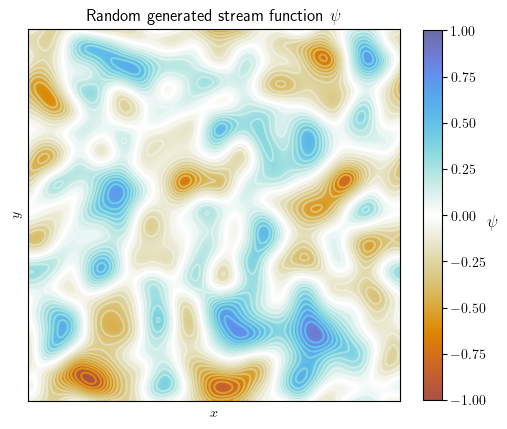

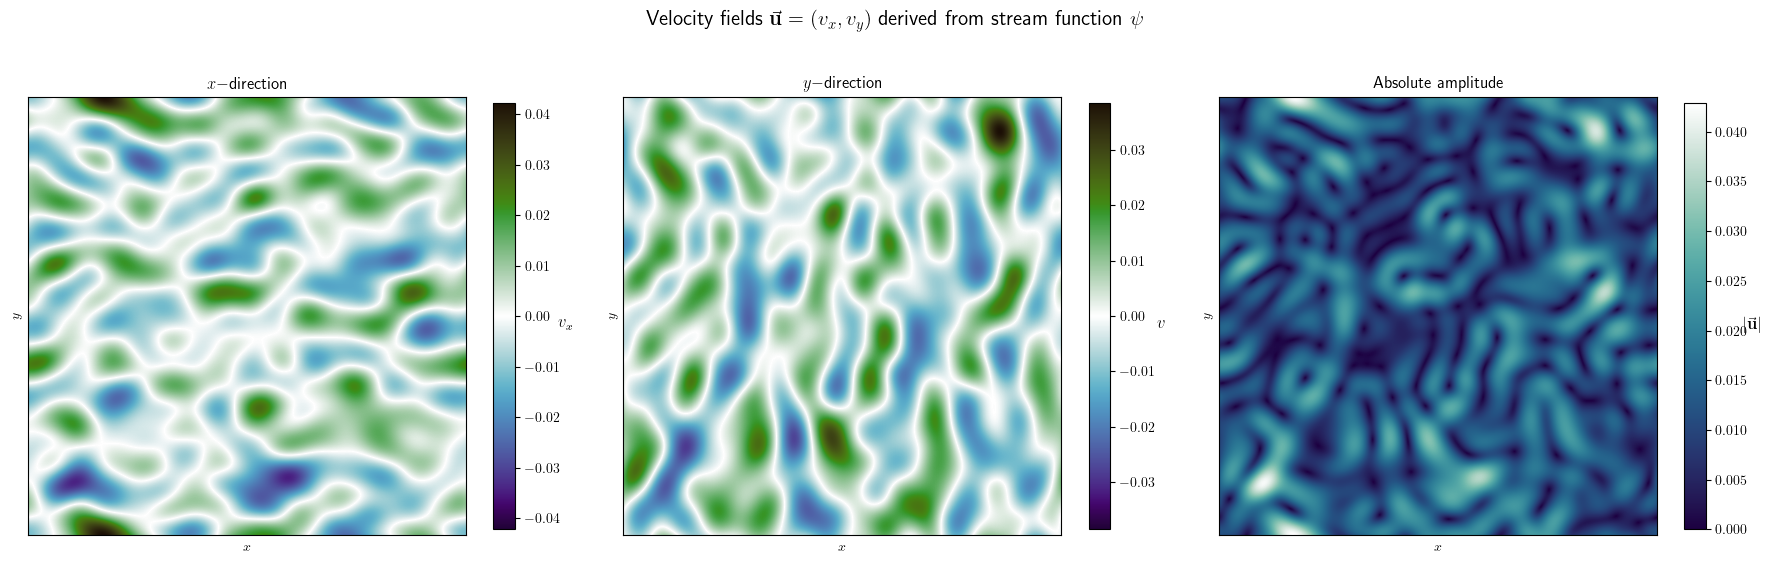

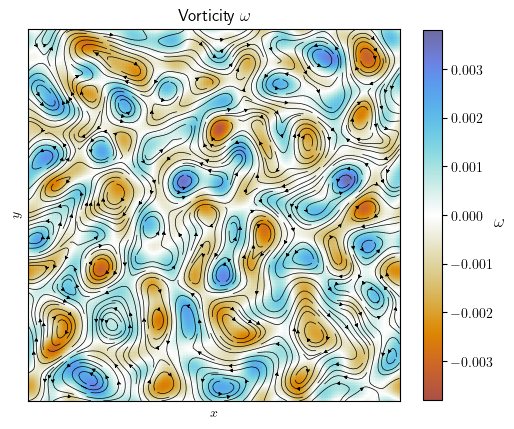

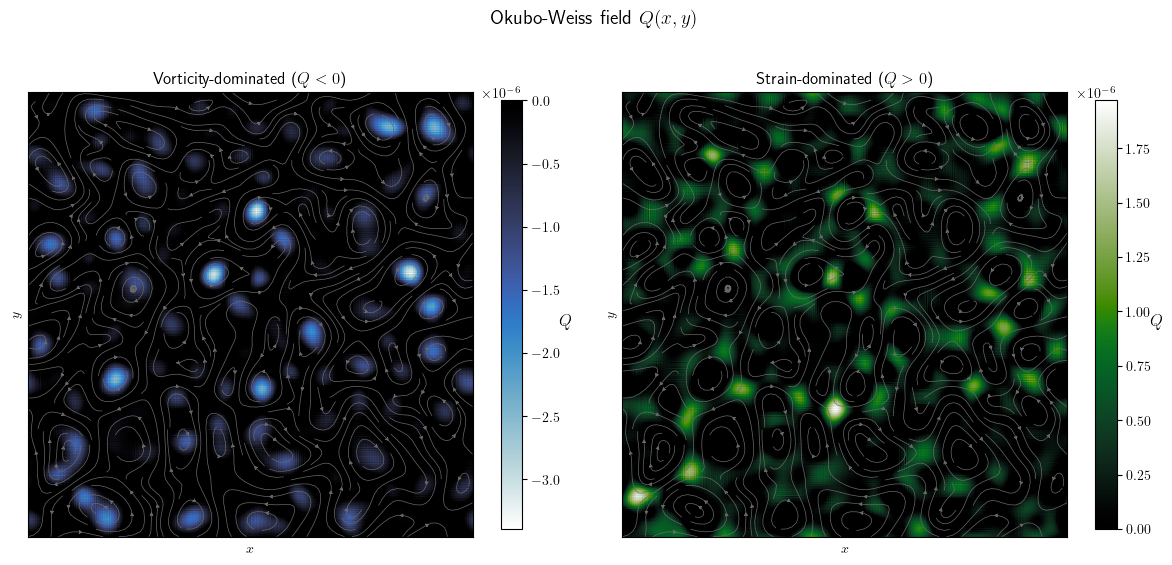

In [2]:
N       = 512         # System size in pixels
sigma   = N//20       # Determines the variation in the generated random streamfunction, smaller sigma gives more variation due to less smoothing of the random field
dpi     = 100         # Resolution of the figures in Dots Per Inch (DPI)
figsize = 6           # Size of the figure

# generate random stream function and calculate the derivatives
psi = getRandomStreamFunction(N, sigma)
vx = -ddy(psi)
vy =  ddx(psi)
omega = getVorticity(vx, vy)
Q = getOkuboWeiss(psi)

plotStreamFunction(psi = psi, figsize = figsize, dpi = dpi)
plotVelocityfields(vx = vx, vy = vy, figsize = figsize, dpi = dpi)
plotVorticity(vx = vx, vy = vy, omega = omega, figsize = figsize, dpi = dpi)
plotOkuboWeissField(Q = Q, vx = vx, vy = vy, figsize = figsize, dpi = dpi)

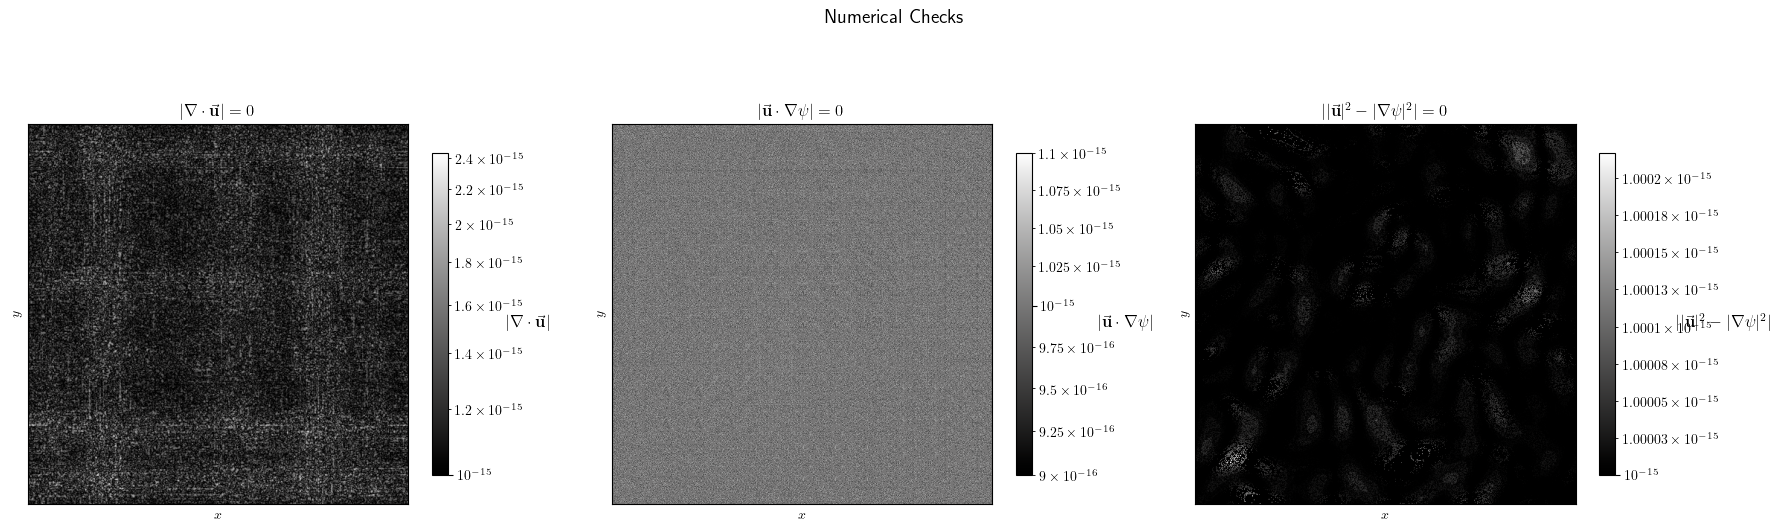

In [3]:
plotNumericalChecks(psi = psi, vx = vx, vy = vy, figsize = figsize, dpi = dpi)

## Results
The notebook computes and visualizes:
- The synthetic, randomly generated stream function $\psi$ with its isolines.
- The velocity field components $v_x$ and $v_y$ and their magnitude $\left|\vec{\mathbf{u}}\right|$.
- The vorticity $\omega$ with overlaid streamlines to indicate the direction of the flow.
- The Okubo-Weiss field $Q$, highlighting vorticity ($Q < 0$, blue) and strain ($Q > 0$, green) dominated regions with different colors.
- Numerical validation plots show that the mentioned equalities hold for the floating-point number precision that is used in the code (around $10^{-15}$). They highlight the correctness of the analytical equations and the numerical implementation in the code.

## References
[1] Okubo, Akira. "Horizontal dispersion of floatable particles in the vicinity of velocity singularities such as convergences." Deep sea research and oceanographic abstracts. Vol. 17. No. 3. Elsevier, 1970.

[2] Weiss, John. "The dynamics of enstrophy transfer in two-dimensional hydrodynamics." Physica D: Nonlinear Phenomena 48.2-3 (1991): 273-294.